<b>Importing Libraries</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Defining a "Search-Space"</b> <br>
Essentially we're just looking at $[a,b]\times[c,d]\subset\mathbb{R}^2$ with a step-length of $h$

In [3]:
def searchspace(a,b,c,d,h):
    xmesh = np.arange(a,b,h)
    ymesh = np.arange(c,d,h)
    searchspace = []
    for i in xmesh:
        for j in ymesh:
            searchspace.append(np.array((i,j)))
    return(searchspace)

<b>Equipping the above defined Search-Space with the Euclidean metric and the induced point-set metric</b><br>
$d(x,y)=\sqrt{\sum(x_i-y_i)^2}$<br>
$d(x,Y)=\text{min}_{y\in Y}(d(x,y))$

In [4]:
def edis(x,y):
    return(np.sqrt(np.sum(np.square(x - y))))

In [11]:
def dis_point_set(x,Y):
    dis = []
    for i in Y:
        dis.append(edis(x,i))
    return((min(dis))/3)

<b>Defining a list of elements in $B(x,r)$ for an arbitrary choice of $x\in\mathbb{R}^2$ and $r\in\mathbb{R}^+$<b>

In [6]:
def ballvals(searchspace,x,r):
    ball = []
    for i in searchspace:
        if edis(i,x)<r:
            ball.append(i)
    return(ball)

<b> Plotting $B(x,r)$ for an arbitrary choice of $x\in\mathbb{R}^2$ and $r\in\mathbb{R}^+$<b>

In [7]:
def plotball(A):
    return(plt.axis('equal'), sns.scatterplot([A[i][0] for i in range(len(A))],[A[i][1] for i in range(len(A))]))

<b>Example:</b>

In [8]:
ss = searchspace(-2,2,-2,2,0.05)
c1 = np.array([-1,0])
c2 = np.array([1,0])
r = 0.5
b1 = ballvals(ss,c1,r)
b2 = ballvals(ss,c2,r)

/home/kanax/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kanax/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


((-0.05500000000000001,
  0.05500000000000001,
  -0.05500000000000001,
  0.05500000000000001),
 <AxesSubplot:>,
 (-1.5474999999999997,
  -0.5024999999999986,
  -0.5474999999999987,
  0.497500000000002),
 <AxesSubplot:>)

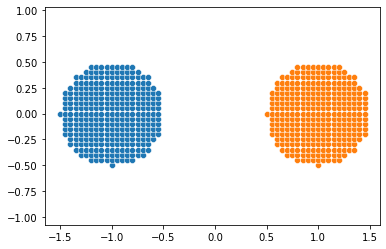

In [9]:
plotball(b1)+plotball(b2)

/home/kanax/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kanax/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kanax/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kana

[((-0.05500000000000001,
   0.05500000000000001,
   -0.05500000000000001,
   0.05500000000000001),
  <AxesSubplot:>),
 ((-2.0575, -0.7924999999999989, -0.7149999999999989, 0.7150000000000022),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.924999999999999, 0.7250000000000022),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.924999999999999, 0.7250000000000022),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.924999999999999, 0.7250000000000022),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.924999999999999, 0.7250000000000022),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.924999999999999, 0.7250000000000022),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.9274999999999991, 0.7775000000000025),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.929999999999999, 0.8300000000000027),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.932499999999999, 0.8825000000000025),
  <AxesSubplot:>),
 ((-2.06, -0.7399999999999989, -0.934999999999999, 0.935000

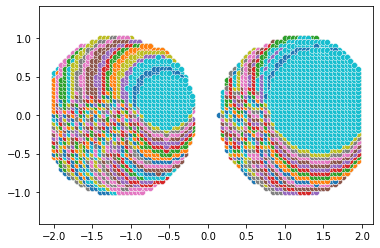

In [12]:
union1 = [ballvals(ss,i,dis_point_set(i,b2)) for i in b1]
union2 = [ballvals(ss,i,dis_point_set(i,b1)) for i in b2]
[plotball(i) for i in union1]+[plotball(i) for i in union2]